# Disease prediction

In [29]:
#TODO: comment 
#TODO: rename columns in datasets 
#TODO: graph styline 
#TODO: write in the instructions 

#DONE : 
#   

In [30]:
# imports
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# 2.0 EDA

In [31]:
#reading the data in

df = pd.read_csv("Cardio-data/cardio_train.csv")

In [32]:
#data checking 

#df.info()
#df.describe()

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [33]:
# number of people with cardio 

df_cardio = pd.DataFrame(df[["cardio"]].value_counts()).rename(columns = {0:"Number of patients"})

print(f"Number of people WITH heart disease : {df_cardio[df_cardio.index == (1,)].values[0][0]}")
print(f"Number of people WITHOUT heart disease : {df_cardio[df_cardio.index == (0,)].values[0][0]}")


Number of people WITH heart disease : 34979
Number of people WITHOUT heart disease : 35021


Text(0.5, 1.0, 'Percentage of people by cholesterol type')

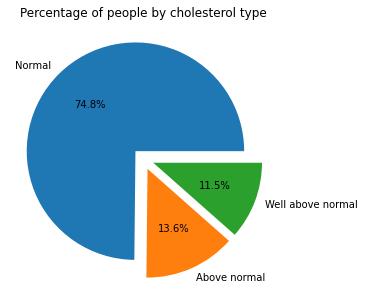

In [34]:
# number of people by cholesterol level
df_cholesterol = pd.DataFrame(df[["cholesterol"]].groupby("cholesterol").size()).rename(columns={0:"Number of people"}).reset_index()

plt.figure(figsize=(10,5))
plt.pie(df_cholesterol["Number of people"], 
            labels = ["Normal","Above normal","Well above normal"], 
            explode=(0.1, 0.1, 0.1),
            autopct='%1.1f%%'
            )
plt.title("Percentage of people by cholesterol type")

[Text(0.5, 1.0, 'Number of patients by age')]

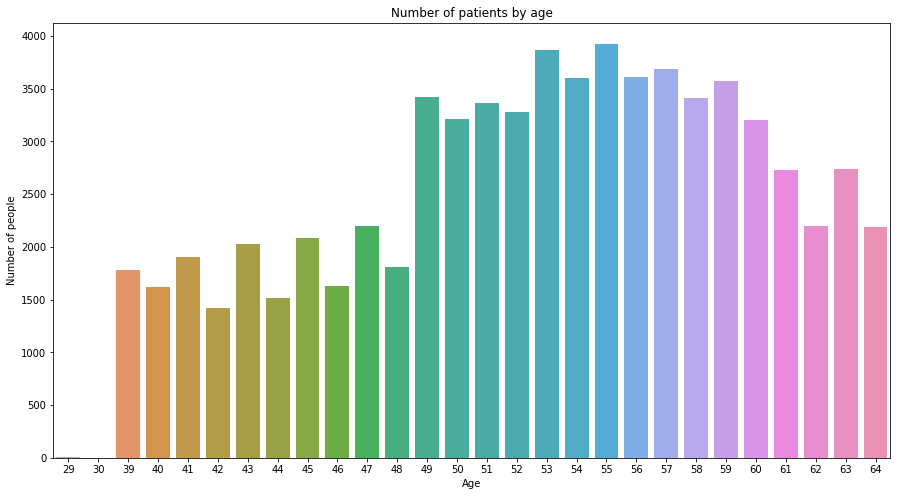

In [35]:
### Age distribution ###

#Age by years
df_age = df["age"]//365 

#Value count for "age"
df_age = pd.DataFrame(df_age.value_counts()).reset_index().rename(columns = {"index":"Age","age":"Number of people"}).sort_values("Age",ascending=True).reset_index(drop=True)

#plot
plt.figure(figsize=(15,8))
sns.barplot(data=df_age, 
                x="Age",
                y="Number of people",
            ).set(title="Number of patients by age")




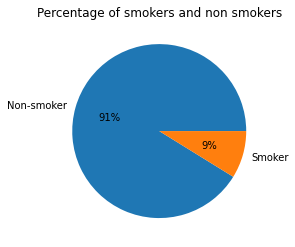

In [36]:
### Percentage of smokers ###

#Count values of smokers and non smokers
df_smoke = df[["smoke"]].value_counts()

#renaming columns 
df_smoke = pd.DataFrame(df_smoke).reset_index().rename(columns = {0:"Number of patients"})
df_smoke["smoke"] = ["Non-smoker","Smoker"]

#plot
plt.pie(df_smoke["Number of patients"], 
            labels = df_smoke["smoke"],
            autopct='%.0f%%' 
            )
plt.title("Percentage of smokers and non smokers")
plt.show()

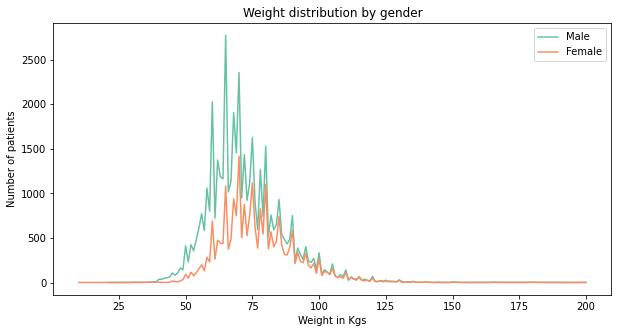

In [37]:
### Weight distribution ###

#group by weight and gender
df_weight = df[["weight","gender"]].astype("int32").groupby(["weight","gender"]).size()

#renaming columns
df_weight = pd.DataFrame(df_weight).reset_index().rename(columns={0:"Number of patients","gender":"Gender","weight":"Weight in Kgs"}).sort_values("Weight in Kgs",ascending=True).reset_index(drop=True)

#plot
plt.figure(figsize=(10,5))
sns.lineplot(data = df_weight, 
                x="Weight in Kgs", 
                y="Number of patients",
                hue="Gender",
                palette ="Set2"
                ).set(title = "Weight distribution by gender")
plt.legend(labels=["Male","Female"])

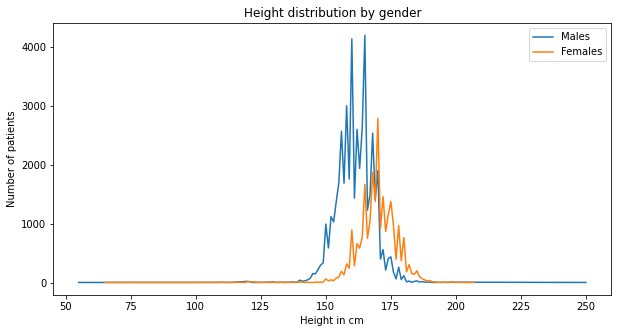

In [38]:
### Height distribution ###

#Height by gender
df_height = df_weight = df[["height","gender"]].astype("int32").groupby(["height","gender"]).size()

#Renaming the columns 
df_height = pd.DataFrame(df_height).reset_index().rename(columns={0:"Number of patients"}).sort_values("height",ascending=True).reset_index(drop=True)

#Plot
plt.figure(figsize=(10,5))
plt.plot(df_height[df_height["gender"]==1]["height"],df_height[df_height["gender"]==1]["Number of patients"])
plt.plot(df_height[df_height["gender"]==2]["height"],df_height[df_height["gender"]==2]["Number of patients"])
plt.ylabel("Number of patients")
plt.xlabel("Height in cm")
plt.title("Height distribution by gender")
plt.legend(("Males","Females"))

Text(0.5, 1.0, 'Females')

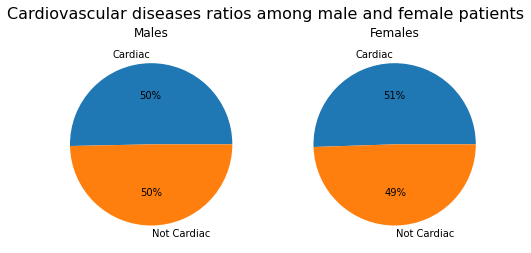

In [39]:
### Percentage of males and female patients having cardio disease ###

# dataframes for each gender 
df_men_cardio = pd.DataFrame(df[df.gender == 1][["cardio"]].value_counts()).reset_index().rename(columns={0:"Number of patients"})
df_women_cardio = pd.DataFrame(df[df.gender == 2][["cardio"]].value_counts()).reset_index().rename(columns={0:"Number of patients"})

#plot
fig,ax = plt.subplots(1,2,figsize=(8,4))
fig.suptitle('Cardiovascular diseases ratios among male and female patients', fontsize=16) # https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/figure_title.html
fig.set_facecolor("white")

ax[0].pie(df_men_cardio["Number of patients"],
            labels = ["Cardiac","Not Cardiac"],
            autopct='%.0f%%' )
ax[0].set_title("Males")

ax[1].pie(df_women_cardio["Number of patients"],
            labels = ["Cardiac","Not Cardiac"],
            autopct='%.0f%%' )
ax[1].set_title("Females")


# 2.1.0 Feature engineering : BMI 

In [79]:
### create BMI index ###

#slicing the original dataframe
df_modified = df[:]

#new column for the BMI
df_modified["BMI"]=df_modified["weight"]/((df_modified["height"]*0.01)**2)

df_modified.head()

/var/folders/q8/kg4v5mr16fv47tpsjyg28zlc0000gn/T/ipykernel_79047/3607361409.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modified["BMI"]=df_modified["weight"]/((df_modified["height"]*0.01)**2)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [80]:
### cleaning unreal and extreme data ###

# removing patients with a BMI under 8 
length = len(df_modified)
df_modified = df_modified[ df_modified.BMI > 15 ]
df_modified.describe()
print("Removed",length-len(df_modified))

Removed 27


In [ ]:
# removing patients with a BMI under 8 
length = len(df_modified)
df_modified = df_modified[ df_modified.BMI > 15 ]
df_modified.describe()
print("Removed",length-len(df_modified))

In [42]:
### creating BMI Categories ###

df_modified["BMI Category"] = [ "normal range" if (X < 25 and X>18.4) 
                                                else ("overweight" if X<30 
                                                else ("obese (class I)" if X<35 
                                                else ("obese (class II)" if X<40 
                                                else ("obese (class III)" if X>=40 
                                                else "Under weight"))))
                                                for X in df_modified["BMI"] ]

df_modified.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI Category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,normal range
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,obese (class I)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,normal range
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,overweight
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,normal range


# 2.1.1 Feature engineering : Blood pressure

In [43]:
#removing negative blood pressure
df_modified = df_modified.drop(df_modified[df_modified["ap_lo"]<0].index)
df_modified = df_modified.drop(df_modified[df_modified["ap_hi"]<0].index)

#removing blood pressure values over 300 ( very rare and almost unrealistic)
df_modified = df_modified.drop(df_modified[df_modified["ap_lo"]>300].index)
df_modified = df_modified.drop(df_modified[df_modified["ap_hi"]>300].index)

#creating blood pressure categories
df_modified["Blood pressure"] = [ "Healthy" if (i<120 and j<80) 
                                            else( "Elevated" if (i>=120 and i< 130  and j<80) 
                                            else( "Stage 1 hypertension" if ((i>=130 and i< 140)  or ( j<90  and j>=80))
                                            else( "Stage 2 hypertension" if ((i>=140 and i<=180)  or ( j<=120  and j>=90))
                                            else("Hypertension crisis" if i>180 or j>90
                                            else "Non classified")))) for i,j in zip(df_modified["ap_hi"],df_modified["ap_lo"])]

df_modified.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI Category,Blood pressure
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,normal range,Stage 1 hypertension
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,obese (class I),Stage 2 hypertension
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,normal range,Stage 1 hypertension
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,overweight,Stage 2 hypertension
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,normal range,Healthy


# 2.2.0 Data visualization

/var/folders/q8/kg4v5mr16fv47tpsjyg28zlc0000gn/T/ipykernel_79047/501466190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cardio_age["age"]=df_cardio_age["age"]//365


<AxesSubplot:xlabel='gluc', ylabel='Number of patients'>

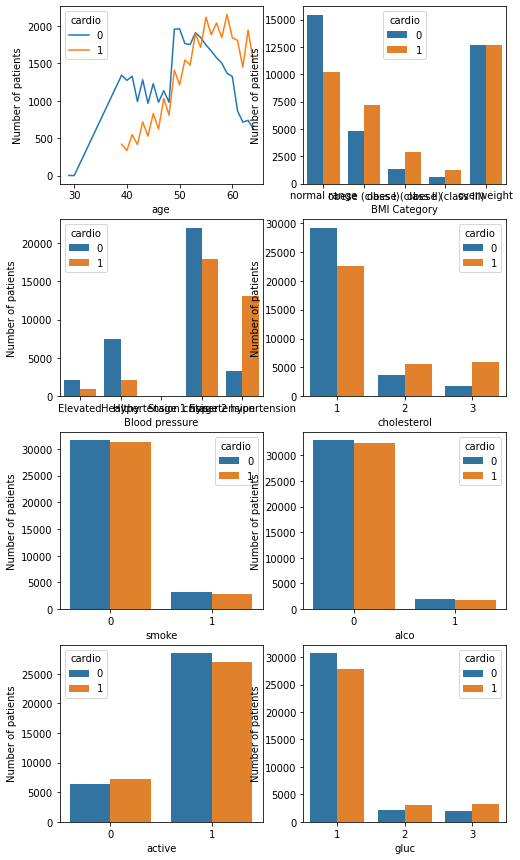

In [44]:
fig,ax = plt.subplots(4,2,figsize=(8,15))

# Cardio vs age 
df_cardio_age=df_modified[["cardio","age"]]
df_cardio_age["age"]=df_cardio_age["age"]//365
df_cardio_age = pd.DataFrame(df_cardio_age.groupby(["age","cardio"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.lineplot(x="age",y="Number of patients",data=df_cardio_age,hue="cardio",ax=ax[0,0])

# Cardio vs BMI 
df_cardio_BMI=pd.DataFrame(df_modified[["cardio","BMI Category"]].groupby(["cardio","BMI Category"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="BMI Category", y="Number of patients", data=df_cardio_BMI,hue="cardio",ax=ax[0,1])


# Cardio vs Blood pressure 
df_cardio_BP=pd.DataFrame(df_modified[["cardio","Blood pressure"]].groupby(["cardio","Blood pressure"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="Blood pressure", y="Number of patients", data=df_cardio_BP,hue="cardio",ax=ax[1,0])


# Cardio vs Cholesterol type 
df_cardio_CT=pd.DataFrame(df_modified[["cardio","cholesterol"]].groupby(["cardio","cholesterol"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="cholesterol", y="Number of patients", data=df_cardio_CT,hue="cardio",ax=ax[1,1])

# cardio vs smoker
df_cardio_smoking=pd.DataFrame(df_modified[["cardio","smoke"]].groupby(["cardio","smoke"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="smoke", y="Number of patients", data=df_cardio_smoking,hue="cardio",ax=ax[2,0])

# cardio vs alcohool 
df_cardio_alcohol=pd.DataFrame(df_modified[["cardio","alco"]].groupby(["cardio","alco"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="alco", y="Number of patients", data=df_cardio_alcohol,hue="cardio",ax=ax[2,1])

# cardio vs active 
df_cardio_activity=pd.DataFrame(df_modified[["cardio","active"]].groupby(["cardio","active"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="active", y="Number of patients", data=df_cardio_activity,hue="cardio",ax=ax[3,0])

# cardio vs glucose
df_cardio_gluc=pd.DataFrame(df_modified[["cardio","gluc"]].groupby(["cardio","gluc"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="gluc", y="Number of patients", data=df_cardio_gluc,hue="cardio",ax=ax[3,1])

# 2.2.1 Correlation visualization

Text(0.5, 1.0, "Heatmap of the features' correlation")

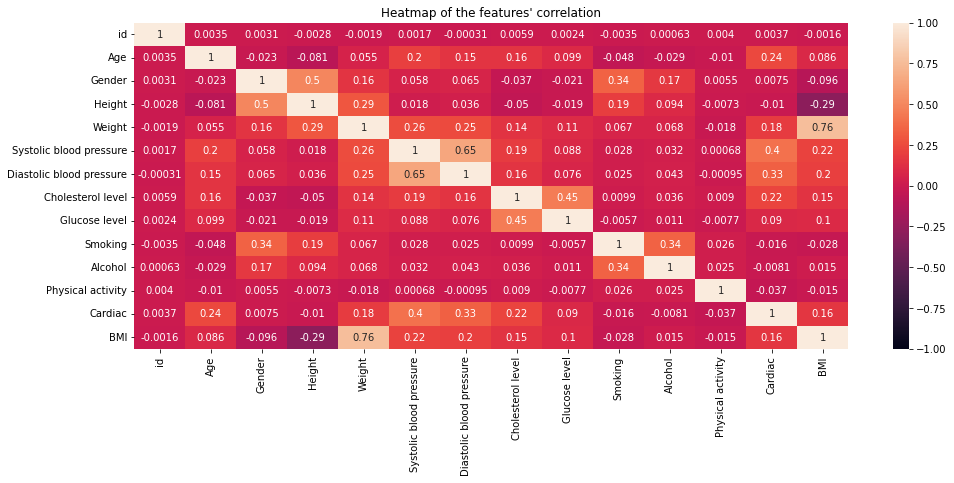

In [45]:
corr_df = df_modified.rename(columns ={"age":"Age", 
                                        "gender":"Gender",
                                        "height":"Height", 
                                        "weight":"Weight", 
                                        "ap_hi":"Systolic blood pressure", 
                                        "ap_lo":"Diastolic blood pressure", 
                                        "cholesterol":"Cholesterol level", 
                                        "gluc":"Glucose level", 
                                        "smoke":"Smoking", 
                                        "alco":"Alcohol", 
                                        "active":"Physical activity", 
                                        "cardio":"Cardiac", 
                                        })

plt.figure(figsize=(16, 6))
sns.heatmap(corr_df.corr(), vmin=-1, vmax=1, annot=True)
plt.title("Heatmap of the features' correlation")

### The features with highest/lowest correlation : 
- **Diastolic/systolic blood pressure (0.65)**: it is very normale that these values correlate as they tend to both increase or decrease.
- **Height/Gender (0.5)** : We can see from the figure previousely made for the age distribution for males and females that males tend to be taller than females, which makes the gender and height correlate to a certain point. Weight and gender on the other hand have a correlation close to 0.
- **Weight/BMI (0.76)** : The weight is a nominator in the equation of calculation of the BMI, so the BMI increases as the weight increases 
- **Height/BMI (-0.29)** : The height is a denominator in the equation of calculation of the BMI, the BMI increases as the height decreases, thus the negative correlation.

# 2.3 Create 2 datasets

In [46]:
df_discrete = df_modified.drop(["ap_hi","ap_lo","height","weight","BMI"],axis=1)

df_discrete.columns

Index(['id', 'age', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active',
       'cardio', 'BMI Category', 'Blood pressure'],
      dtype='object')

In [47]:
df_discrete_onehot = pd.get_dummies(df_discrete, columns = ["gender", "BMI Category", "Blood pressure"], drop_first=True)

df_discrete_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68997 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   id                                   68997 non-null  int64
 1   age                                  68997 non-null  int64
 2   cholesterol                          68997 non-null  int64
 3   gluc                                 68997 non-null  int64
 4   smoke                                68997 non-null  int64
 5   alco                                 68997 non-null  int64
 6   active                               68997 non-null  int64
 7   cardio                               68997 non-null  int64
 8   gender_2                             68997 non-null  uint8
 9   BMI Category_obese (class I)         68997 non-null  uint8
 10  BMI Category_obese (class II)        68997 non-null  uint8
 11  BMI Category_obese (class III)       68997 non-null  u

In [72]:
df_discrete_onehot.shape , df_continuous_onehot.shape

((68997, 17), (68997, 12))

In [48]:
df_continuous = df_modified.drop(["BMI Category", "Blood pressure","height","weight"],axis=1)

df_continuous.head()


,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,100,60,1,1,0,0,0,0,23.011177


In [49]:
df_continuous_onehot = pd.get_dummies(df_continuous,columns=["gender"], drop_first=True)

df_continuous_onehot.head()


,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,gender_2
0,0,18393,110,80,1,1,0,0,1,0,21.967120,1
1,1,20228,140,90,3,1,0,0,1,1,34.927679,0
2,2,18857,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,100,60,1,1,0,0,0,0,23.011177,0


# 2.4 Chosing models 

In [50]:
#TODO: Try : RandomForest,SVM,KNN,LogisticRegression

In [51]:
# train test split 
from sklearn.model_selection import train_test_split

#splitting data into X and y : discrete data
X_d = df_discrete_onehot.drop(["id","cardio"],axis = 1)
y_d = df_discrete_onehot[["cardio"]]

#splitting data into X and y : continuous data
X_c = df_continuous_onehot.drop(["cardio","id"],axis = 1)
y_c = df_continuous_onehot[["cardio"]]

#train validation test split : discrete data
X_train_d,X_test_d,y_train_d,y_test_d = train_test_split(X_d,y_d,test_size=.5)
X_val_d,X_test_d,y_val_d,y_test_d = train_test_split(X_test_d,y_test_d,test_size=.5)

#train validation test split : continuous data
X_train_c,X_test_c,y_train_c,y_test_c = train_test_split(X_c,y_c,test_size=.5)
X_val_c,X_test_c,y_val_c,y_test_c = train_test_split(X_test_c,y_test_c,test_size=.5)

#print the shapes
print("Discrete dataframe : ")
print(f"Shapes of train data : {X_train_d.shape} and {y_train_d.shape}")
print(f"Shapes of validation data : {X_val_d.shape} and {y_val_d.shape}")
print(f"Shapes of test data : {X_test_d.shape} and {y_test_d.shape}")

print("\nContinuous dataframe : ")
print(f"Shapes of train data : {X_train_c.shape} and {y_train_c.shape}")
print(f"Shapes of validation data : {X_val_c.shape} and {y_val_c.shape}")
print(f"Shapes of test data : {X_test_c.shape} and {y_test_c.shape}")

Discrete dataframe : 
Shapes of train data : (34498, 15) and (34498, 1)
Shapes of validation data : (17249, 15) and (17249, 1)
Shapes of test data : (17250, 15) and (17250, 1)

Continuous dataframe : 
Shapes of train data : (34498, 10) and (34498, 1)
Shapes of validation data : (17249, 10) and (17249, 1)
Shapes of test data : (17250, 10) and (17250, 1)
